In [1]:
import numpy as np
from scipy.linalg import eigh_tridiagonal
from matplotlib import pyplot as plt

Playing around with stuff from class

In [ ]:
# Define the stretch of space with zero potential
x = np.linspace(-10,10,3000)
dx = x[1] - x[0]
a = 5  # length of box
V0 = 500  # potential inside box
V = 0 * np.ones((len(x)))
V[np.abs(x)>a/2] = V0  # set potential to zero inside the box
plt.clf()
plt.plot(x,V)
plt.show()


# Define Hamiltonian
vec = np.ones(len(x))/dx**2
H_diag = vec + V
H_offdiag = -0.5*vec[:-1]
e,psi = eigh_tridiagonal(H_diag,H_offdiag)  # eigenvalues & eigenstates (wavefunctions)
# plt.clf()
# plt.plot(x,psi[:,0], label='ground state')
# plt.plot(x,psi[:,1], label='1st excited state')
# --
labels = ['ground state', '1st excited state', '2nd excited state']
plt.plot(x, psi[:,:3]/np.sqrt(dx), label=labels)  # normalized wavefunctions
plt.plot(x, V/V0, label='potential')  # potential box
# --
plt.legend()
plt.show()
print(psi.shape)


Setup

In [3]:
# Define the stretch of space with zero potential
x = np.linspace(-10,10,3001)
dx = x[1] - x[0]
a = 1  # length of box
V0 = 0  # potential inside box
V = 0 * np.ones((len(x)))
V[np.abs(x)>a/2] = V0  # set potential to zero inside the box

# Define Hamiltonian
vec = np.ones(len(x))/dx**2
H_diag = vec + V
H_offdiag = -0.5*vec[:-1]
E,psi = eigh_tridiagonal(H_diag,H_offdiag)  # eigenvalues (energies) & eigenstates (wavefunctions)

Gaussian (Redoing 6.4)

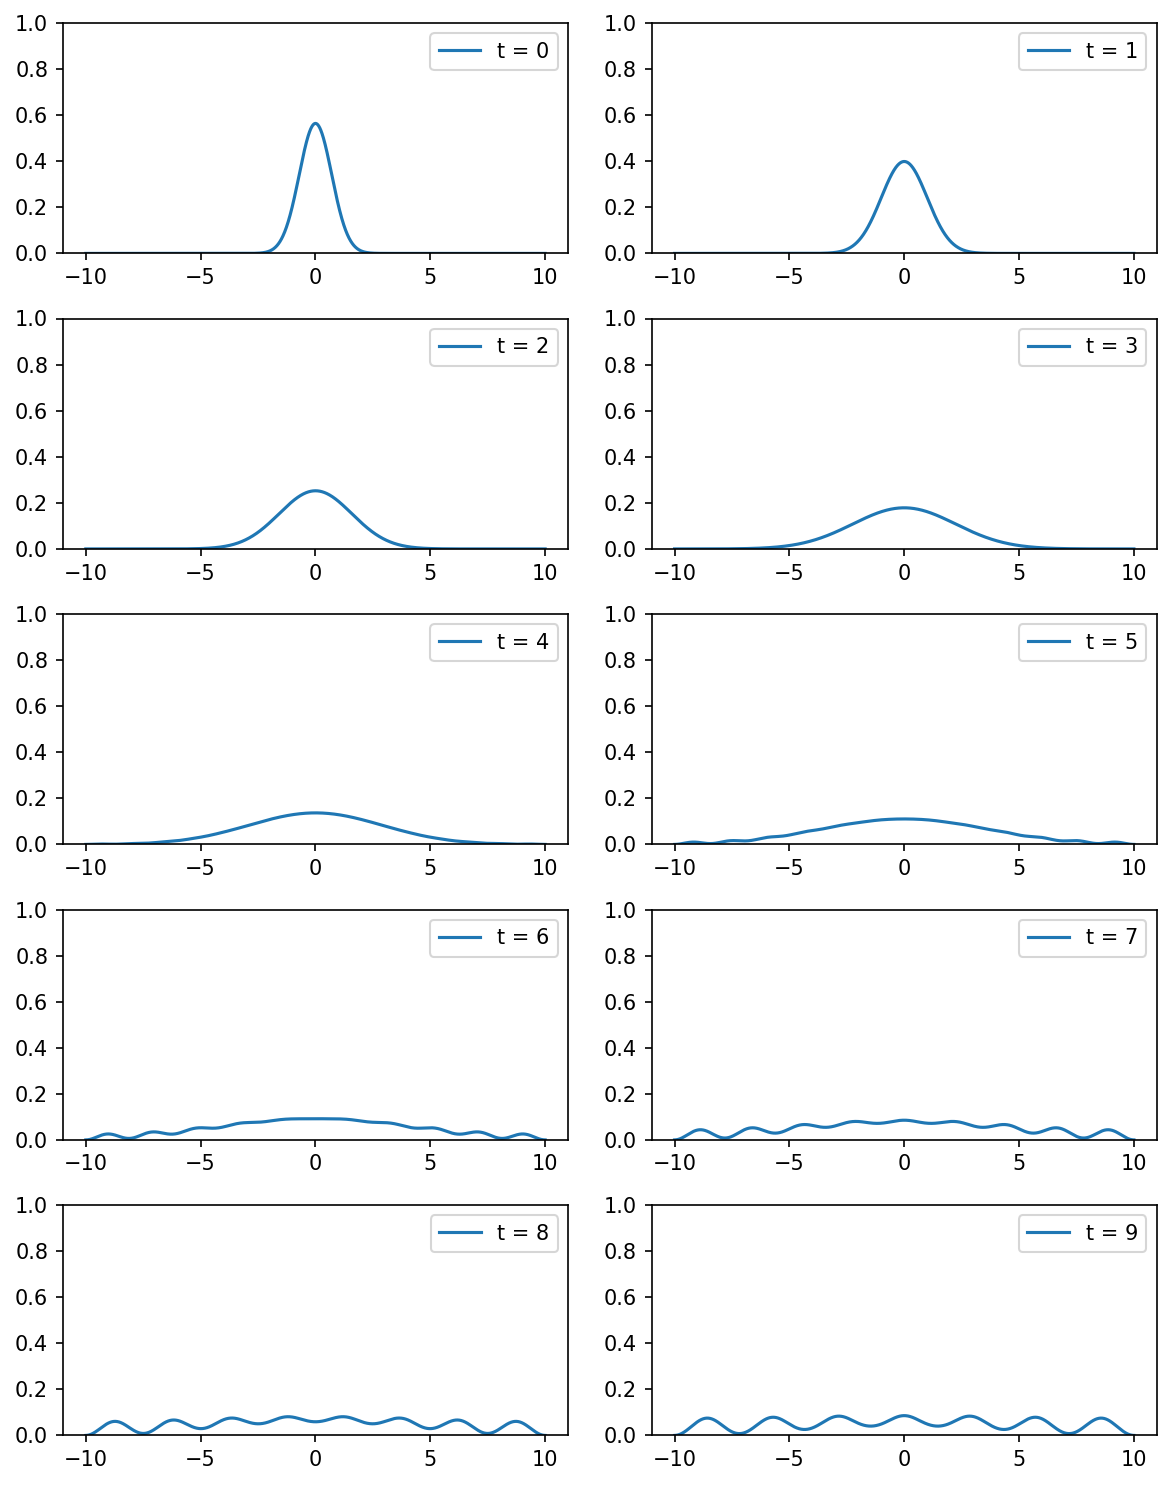

In [4]:
# Gaussian wave packet given by 6.4
psi0 = np.exp(-0.5*x**2 / a**2) / np.sqrt(np.sqrt(np.pi) * a)
amps0 = psi.T@psi0  # amplitudes

# Time evolution of the wavefunction
t_values = np.arange(0,10,1)
fig, axes = plt.subplots(int(len(t_values)/2),2, figsize=(8,10), dpi=150)
for i,t in enumerate(t_values):
    amps = amps0*np.exp(-1j*t*E)
    psi_cur = psi@amps
    ax = axes[i//2,i%2]
    ax.plot(x, np.abs(psi_cur)**2, label = f't = {t}')
    ax.set_ylim(0,1)
    ax.legend()

plt.tight_layout()
plt.show()

In [6]:
# Checking half width
def fwhm(t, psi=psi, amps0=amps0, x=x):
    # Get wave function at time t
    amps = amps0*np.exp(-1j*t*E)
    psi_cur = psi@amps
    prob = np.abs(psi_cur)**2

    # Find the half width
    half_pos = len(prob)//2
    x_pos1 = np.argmin(np.abs(prob[:half_pos+1] - np.max(prob)/2))
    x_pos2 = np.argmin(np.abs(prob[half_pos:] - np.max(prob)/2)) + half_pos
    fwhm = np.abs(x[x_pos1]-x[x_pos2])  # half width
    print(f'At t={t:.2f}: {fwhm:.3f}')
    
    return fwhm

print(fwhm(np.sqrt(3))/fwhm(0))

At t=1.73: 3.333
At t=0.00: 1.667
2.000000000000001


Boxcar

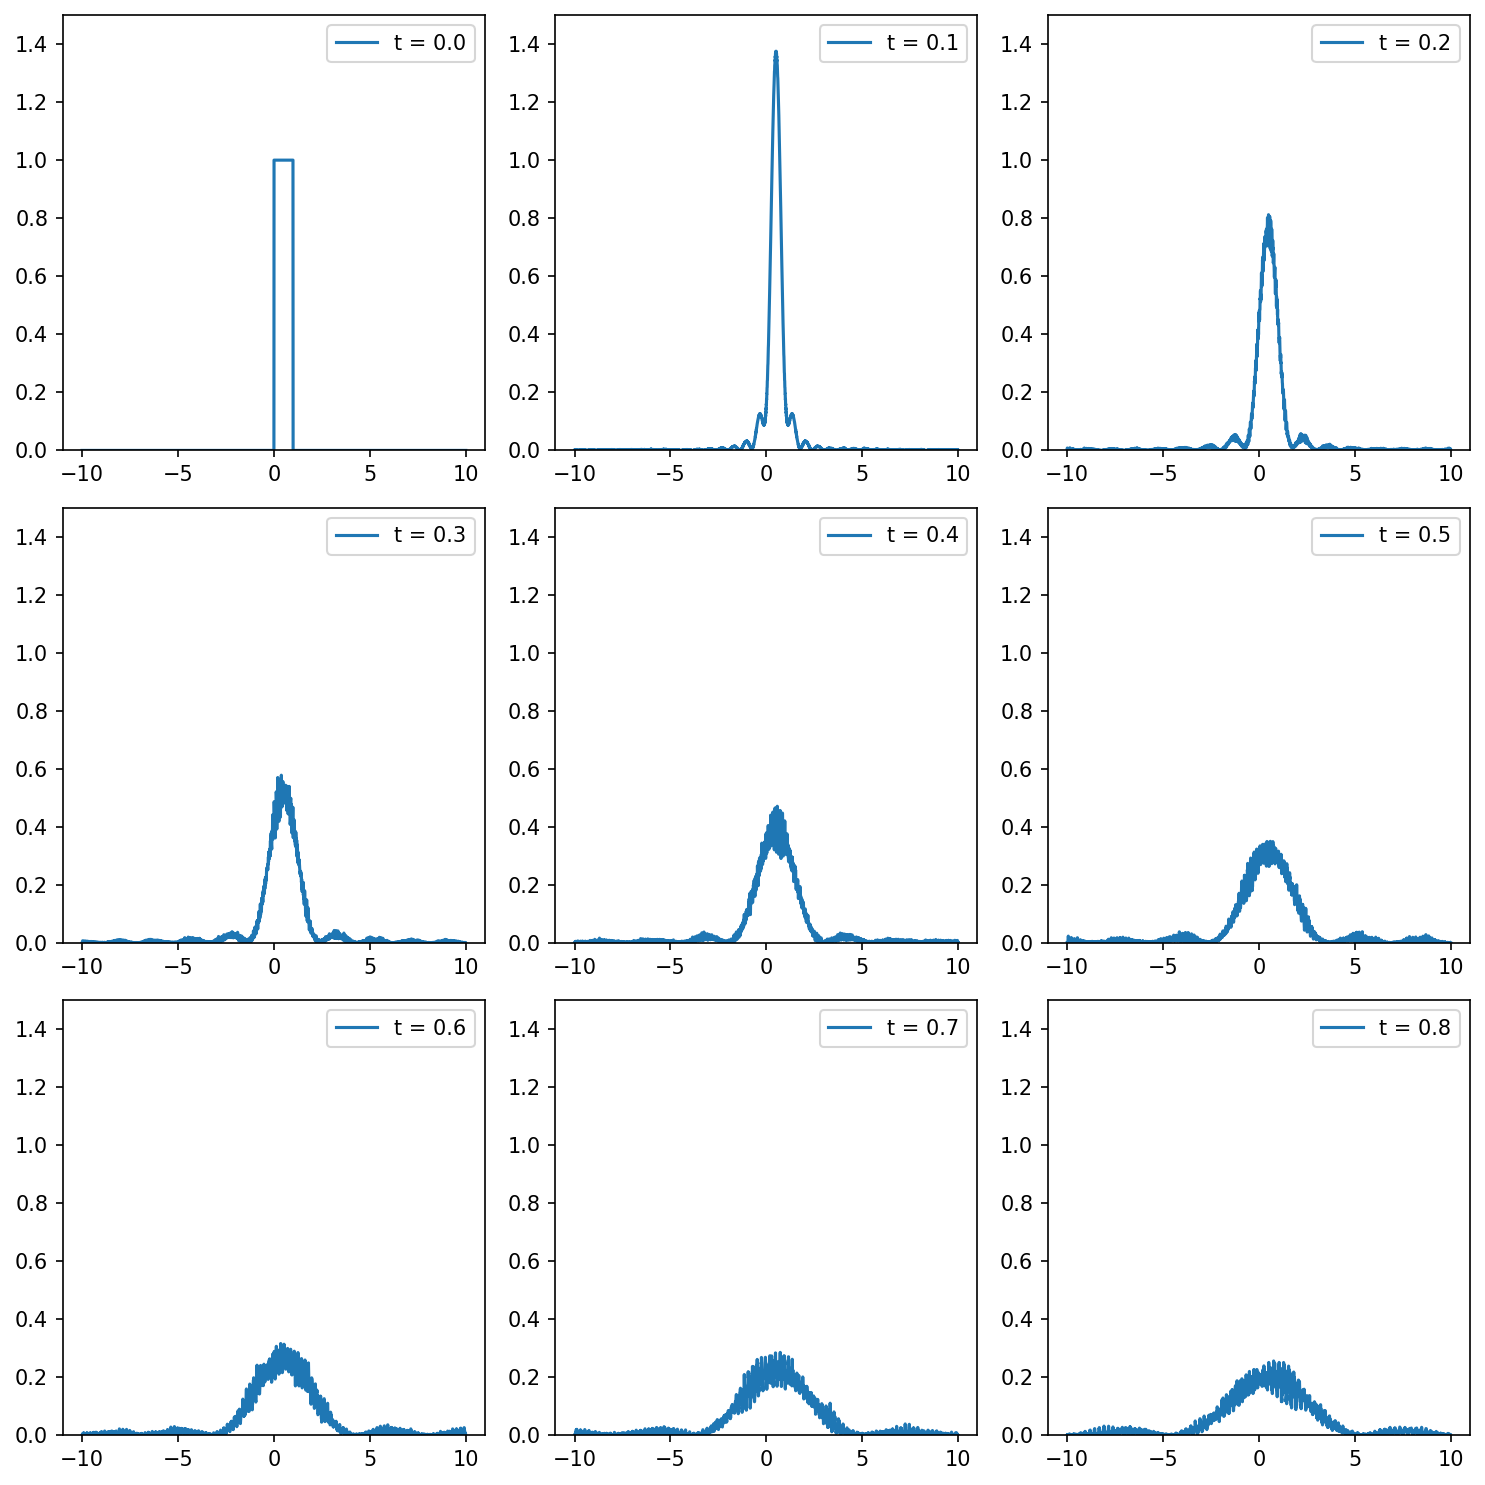

In [32]:
# Boxcar wave function: 1 for 0 < x < 1, 0 elsewhere
psi0 = np.zeros(len(x))
psi0[(x > 0) & (x < 1)] = 1
amps0 = psi.T@psi0  # amplitudes

# Time evolution of the wavefunction
t_values = np.arange(0,0.9,0.1)
fig, axes = plt.subplots(int(len(t_values)/3),3, figsize=(10,10), dpi=150)
for i,t in enumerate(t_values):
    amps = amps0*np.exp(-1j*t*E)
    psi_cur = psi@amps
    ax = axes[i//3,i%3]
    ax.plot(x, np.abs(psi_cur)**2, label = f't = {t:.1f}')
    ax.set_ylim(0,1.5)
    ax.legend()

plt.tight_layout()
plt.show()